In [1]:
import numpy as np 
import os 
import pandas as pd 

In [2]:
# 1876
full_class_infoTable = pd.read_csv('../panoramic_view/clusters_all.csv')

In [3]:
nlp_class = []
for i in range(len(full_class_infoTable)):
    f_id = full_class_infoTable['full_cluster_2'].iloc[i]-1
    t_id = full_class_infoTable['tract_cluster_2'].iloc[i]-1
    a_id = full_class_infoTable['arbor_cluster_3'].iloc[i]-1
    b_id = full_class_infoTable['bouton_cluster_2'].iloc[i]-1
    tmp = str(f_id)+str(t_id)+str(a_id)+str(b_id)
    nlp_class.append(tmp)

In [4]:
uniq_nlp = np.unique(nlp_class)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
nlp_table = pd.read_csv('../panoramic_view/gene_label_table.csv',dtype='str')

In [13]:
R = ['CNU', 'CTX', 'TH', 'HB']
match_R_pattern = np.zeros((uniq_nlp.shape[0],4))
for i in range(len(nlp_table)):
    # r = nlp_table['region'].iloc[i]
    # if r in target_region2:
    nlp_tmp = nlp_table['nlp'].iloc[i]
    g_tmp = full_class_infoTable['region_rough'].iloc[i]
    nlp_id = list(uniq_nlp).index(nlp_tmp)
    if g_tmp not in R:
        continue
    g_id = R.index(g_tmp)
    match_R_pattern[nlp_id,g_id] += 1

In [14]:
match_R_pattern_p = []
# uniq_nlp_R = []
for i in range(match_R_pattern.shape[1]):
    if np.sum(match_R_pattern[:,i]) == 0:
        match_R_pattern_p.append(match_R_pattern[:,i])
    else:
        match_R_pattern_p.append(match_R_pattern[:,i]/np.sum(match_R_pattern[:,i]))
match_R_pattern_p = np.array(match_R_pattern_p).T

In [15]:
match_R_pattern_p2 = match_R_pattern_p.copy()
match_R_pattern_p2[:,0] = match_R_pattern_p[:,1]
match_R_pattern_p2[:,1] = match_R_pattern_p[:,2]
match_R_pattern_p2[:,2] = match_R_pattern_p[:,0]

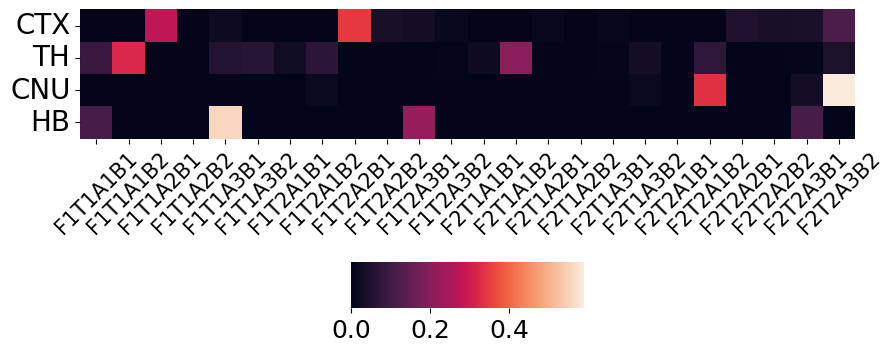

In [16]:
plt.figure(figsize=(10,8))
xname = []
fl = ['F','T','A','B']
for i in uniq_nlp:
    tmp_name = ''
    for j in range(len(fl)):
        tmp_name = tmp_name + fl[j] + str(int(i[j])+1)
    xname.append(tmp_name)
        
m = sns.heatmap(match_R_pattern_p2.T,cbar_kws={'shrink':0.3,'aspect':5,'orientation':'horizontal','pad':0.2},
            square=True,xticklabels=xname,yticklabels=['CTX','TH','CNU','HB'])
cbar = m.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
plt.tick_params(axis='x',labelsize=15,rotation=45)
plt.tick_params(axis='y',labelsize=20,rotation=0)
# plt.savefig('figs_stats/region/pattern_rough2.png',dpi=300,bbox_inches='tight')

In [20]:
target_region = ['AId','CLA','RSPv','SSp-ll','SSp-ul','VISp','VISrl','SSs','MOs','MOp',
                 'SSp-un','SSp-m','SSp-bfd','SSp-n','LD','VM','SMT','LP','MG','VPL','VPM','LGd',
                 'RT','OT','ACB','CP']

In [22]:
#### pattern match with g_label; transcription factor
uniq_nlp = np.unique(nlp_class)
# uniq_g = np.unique(np.array(full_class_infoTable['region']))
# match_glabel = np.zeros((uniq_nlp.shape[0],uniq_g.shape[0]))
match_glabel = np.zeros((uniq_nlp.shape[0],len(target_region)))
for i in range(len(nlp_table)):
    nlp_tmp = nlp_table['nlp'].iloc[i]
    g_tmp = nlp_table['region'].iloc[i]
    nlp_id = list(uniq_nlp).index(nlp_tmp)
    if g_tmp not in target_region:
        continue
    g_id = list(target_region).index(g_tmp)
    match_glabel[nlp_id,g_id] += 1

In [25]:
match_glabel_p = []
for i in range(match_glabel.shape[1]):
    match_glabel_p.append(match_glabel[:,i]/np.sum(match_glabel[:,i]))
match_glabel_p = np.array(match_glabel_p).T

In [26]:
tmp = []
for i in range(match_glabel.shape[0]):
    if np.sum(match_glabel[i,:]) == 0:
        tmp.append(match_glabel[i,:])
    else:
        tmp.append(match_glabel[i,:]/np.sum(match_glabel[i,:]))
tmp = np.array(tmp)

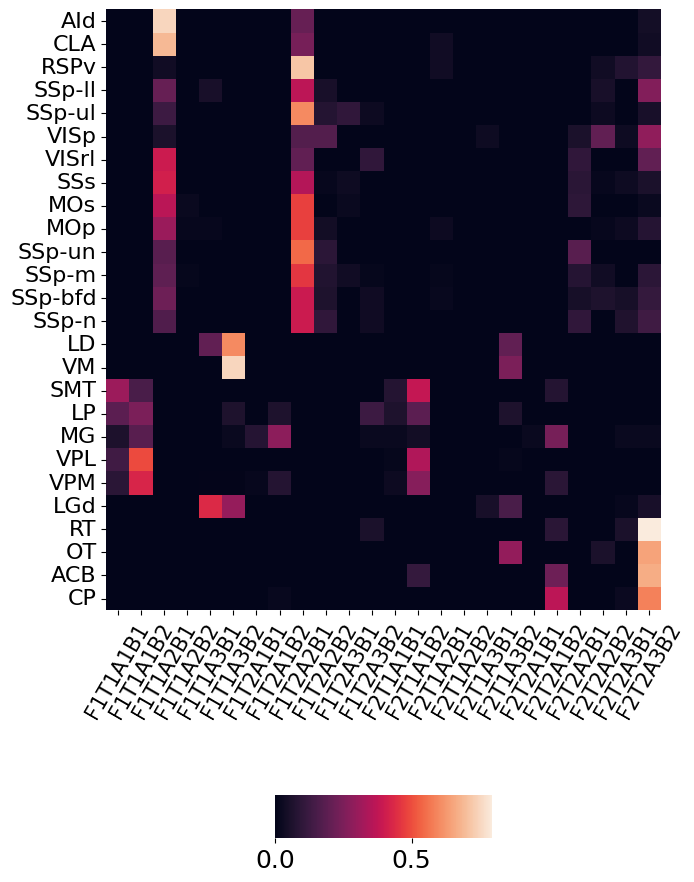

In [28]:
xname = []
fl = ['F','T','A','B']
for i in uniq_nlp:
    tmp_name = ''
    for j in range(len(fl)):
        tmp_name = tmp_name + fl[j] + str(int(i[j])+1)
    xname.append(tmp_name)
    
plt.figure(figsize=(14,12))
m = sns.heatmap(match_glabel_p.T,cbar_kws={'shrink':0.2,'aspect':5,'orientation':'horizontal','pad':0.2},
            square=True,yticklabels=target_region,xticklabels=xname)
cbar = m.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
plt.tick_params(axis='x',labelsize=15,rotation=60)
plt.tick_params(axis='y',labelsize=16)
# plt.savefig('figs_stats/region/pattern2.png',dpi=300,bbox_inches='tight')

In [29]:
color_circle = [['firebrick','indianred'],['royalblue','lightskyblue'],
                ['darkviolet','mediumorchid','plum'],['forestgreen','limegreen']]

In [30]:
### CTX
count_level_based = []
count_level_based_colors = []
for i in ['CTX','TH','CNU']:
    tmp = [[] for p in range(4)]
    tmp2 = [[] for p in range(4)]
    for j in range(2):
        rows = full_class_infoTable[(full_class_infoTable['region_rough']==i)&(full_class_infoTable['full_cluster_2']==j+1)&(full_class_infoTable['Soma_region'].isin(target_region))]
        tmp[0].append(len(rows))
        if len(rows) == 0:
            tmp2[0].append('white')
        else:
            tmp2[0].append(color_circle[0][j])
        for k in range(2):
            rows2 = rows[rows['tract_cluster_2'] == k+1]
            tmp[1].append(len(rows2))
            if len(rows2) == 0:
                tmp2[1].append('white')
            else:
                tmp2[1].append(color_circle[1][k])
            for m in range(3):
                rows3 = rows2[rows2['arbor_cluster_3'] == m+1]
                tmp[2].append(len(rows3))
                if len(rows3) == 0:
                    tmp2[2].append('white')
                else:
                    tmp2[2].append(color_circle[2][m])
                for n in range(2):
                    rows4 = rows3[rows3['bouton_cluster_2']== n+1]
                    tmp[3].append(len(rows4))
                    if len(rows4) == 0:
                        tmp2[3].append('white')
                    else:
                        tmp2[3].append(color_circle[3][n])
    count_level_based.append(tmp)
    count_level_based_colors.append(tmp2)

In [31]:
from matplotlib.patches import Circle, Wedge

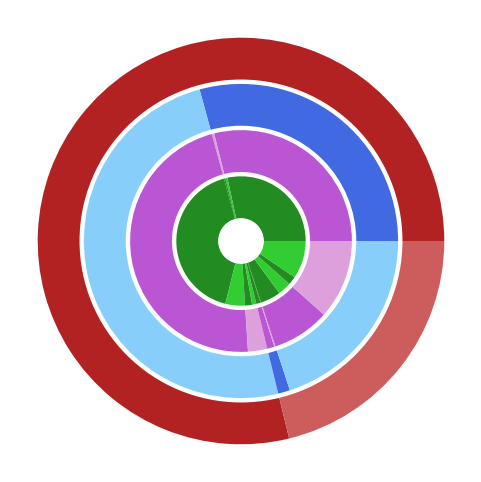

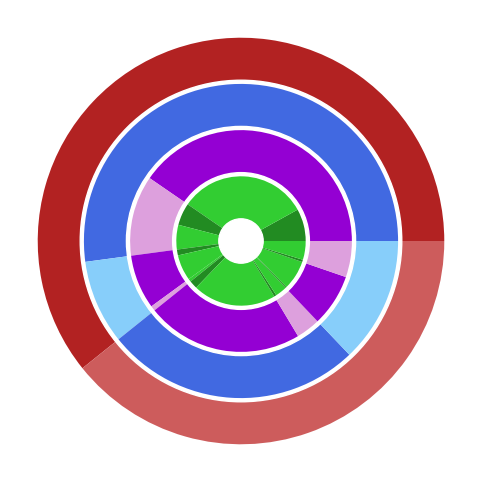

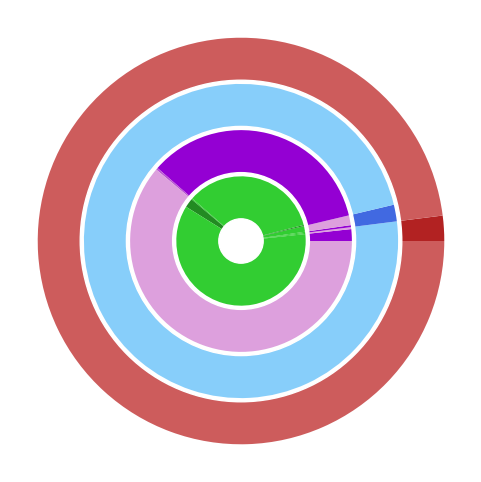

In [32]:
R = ['CTX','TH','CNU']
for m in range(len(R)):
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    all_wedges = []

    for i in range(4):
        N = len(count_level_based[m][i])
        
        radius = 1.1-i*0.25
        
        values = count_level_based[m][i]
        colors = count_level_based_colors[m][i]
        
        plt.pie(values,colors = colors,radius=radius)
        
        my_circle = plt.Circle((0,0),radius-0.23,color='white')
        p = plt.gcf()
        p.gca().add_artist(my_circle)
    # plt.savefig('figs_stats/component_'+str(R[m])+'.png',dpi=300,bbox_inches='tight')
    # plt.close()

In [33]:
entropy_level = []
for r in target_region:
    rows = full_class_infoTable[full_class_infoTable['Soma_region'] == r]
    tmp = []
    for i in ['full_cluster_2','tract_cluster_2','arbor_cluster_3','bouton_cluster_2']:
        probs = rows[i].value_counts(normalize=True)
        N = len(rows[i].value_counts())
        e = -(probs * np.log(probs)/np.log(np.e)).sum()
        if N == 1:
            e2 = 0
        else:
            e2 = e/np.log(N)
        tmp.append(e2)
    entropy_level.append(tmp)    

In [34]:
entropy_level = np.array(entropy_level)

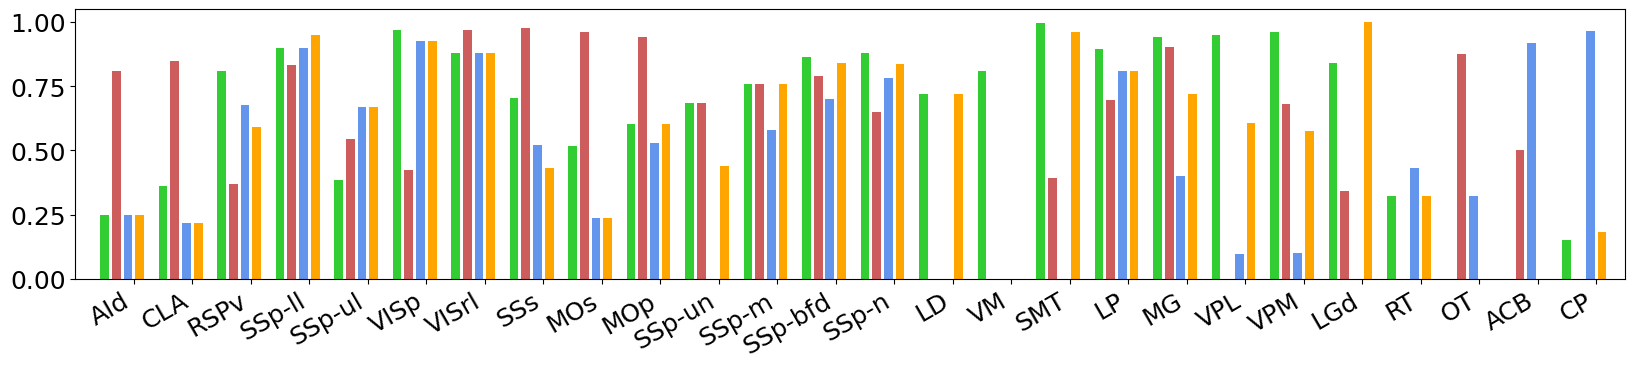

In [36]:
level_color = ['limegreen','indianred','cornflowerblue','orange']
plt.figure(figsize=(20,3.5))
for i in range(4):
    plt.bar([j+0.2*i for j in range(len(target_region))], entropy_level[:,i],width=0.15,
        color = level_color[i])
plt.xlim(-0.5,26)
plt.xticks([i+0.5 for i in range(len(target_region))],target_region,rotation=30,ha='right')
plt.tick_params(labelsize=18)
# plt.savefig('figs_stats/entropy_level.png',dpi=300,bbox_inches='tight')